In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from dagmm import DAGMM
from sklearn.preprocessing import MinMaxScaler
import time
CSV_FILE_PATH ='F:\python_code\imba_09-11181308-MachineLearningCVE\MachineLearningCVE\kddcup.csv'
data = pd.read_csv(CSV_FILE_PATH, header=0,names=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
                                                  'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 
                                                  'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
                                                  'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
                                                  'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                                                  'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                                                  'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                                                  'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
                                                  'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'type'])


data.loc[data["type"] != "normal.", 'type'] = 0
data.loc[data["type"] == "normal.", 'type'] = 1
one_hot_protocol = pd.get_dummies(data["protocol_type"])
one_hot_service = pd.get_dummies(data["service"])
one_hot_flag = pd.get_dummies(data["flag"])

data = data.drop("protocol_type",axis=1)
data = data.drop("service",axis=1)
data = data.drop("flag",axis=1)

data = pd.concat([one_hot_protocol, one_hot_service,one_hot_flag,data],axis=1)


sc = MinMaxScaler(feature_range=(0, 1))  
Dataset = data.values
labels=Dataset[:,-1]
Dataset=Dataset[:,0:-1]
labels= np.where(labels!=1,0,1)

cnt0=0
cnt1=0
for i in range(len(labels)):
    if labels[i]==1:
        cnt1+=1
    else:
        cnt0+=1
print(cnt0,cnt1)
print(len(Dataset[0]))
df = sc.fit_transform(Dataset)

x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.50, random_state=123)
x_train, y_train = x_train[y_train == 0], y_train[y_train == 0]
start=time.time()
model = DAGMM(
    comp_hiddens=[60, 30, 15, 1], comp_activation=tf.nn.tanh,
    est_hiddens=[10, 5], est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
    learning_rate=0.0001, epoch_size=200, minibatch_size=1024, random_seed=1111
)
model.fit(x_train)
end=time.time()
print(end-start)
print('done')


c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\daysl\appd

396743 97277
118
 epoch 10/200 : loss = 90.329
 epoch 20/200 : loss = 85.556
 epoch 30/200 : loss = 84.079
 epoch 40/200 : loss = 82.341
 epoch 50/200 : loss = 81.876
 epoch 60/200 : loss = 81.518
 epoch 70/200 : loss = 81.022
 epoch 80/200 : loss = 80.066
 epoch 90/200 : loss = 79.002
 epoch 100/200 : loss = 77.994


InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid.
	 [[Node: GMM/Cholesky = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](GMM/add)]]

Caused by op 'GMM/Cholesky', defined at:
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-6929c50b2ed9>", line 59, in <module>
    model.fit(x_train)
  File "F:\python_code\MEAEDE\dagmm\dagmm.py", line 119, in fit
    self.gmm.fit(z, gamma)
  File "F:\python_code\MEAEDE\dagmm\gmm.py", line 53, in fit
    self.L = tf.cholesky(sigma + min_vals[None,:,:])
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\gen_linalg_ops.py", line 423, in cholesky
    "Cholesky", input=input, name=name)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cholesky decomposition was not successful. The input might not be valid.
	 [[Node: GMM/Cholesky = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](GMM/add)]]


In [5]:


y_pred = model.predict(x_test)

# Energy thleshold to detect anomaly = 80% percentile of energies
anomaly_energy_threshold = np.percentile(y_pred, 80)
print(f"Energy thleshold to detect anomaly : {anomaly_energy_threshold:.3f}")
# Detect anomalies from test data
y_pred_flag = np.where(y_pred >= anomaly_energy_threshold, 1, 1)

prec, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_flag, average="binary")
print(f" Precision = {prec:.3f}")
print(f" Recall    = {recall:.3f}")
print(f" F1-Score  = {fscore:.3f}")


Energy thleshold to detect anomaly : -9.781
 Precision = 0.198
 Recall    = 1.000
 F1-Score  = 0.330


c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 33021 missing from current font.
  font.set_text(s, 0.

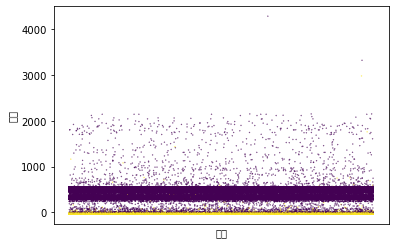

In [6]:
#tets data

import matplotlib.pyplot as plt
x=[]
for i in range(len(y_test)):
    x.append(i)
plt.scatter(x,y_pred,s=0.1,c=y_test)
plt.xlabel("数据")
plt.ylabel("能量")
plt.xticks([])
# plt.yticks([])
plt.show()